<a href="https://colab.research.google.com/github/carloscarvajal1cc/Business_Intelligence_Churn_Prediction/blob/master/Churn_Prediction_Model_for_CRM_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Churn Prediction Modeling for Business Intelligence for Telecommunication Companies














<br>32513 Machine Learning Spring 2019
<br>By Carlos Mario Carvajal Moreno. Student ID: 13144148
<br>Andres Felipe Lagos Rodriguez. Student ID: 13092248
<br>Andres Felipe Lagos Rodriguez. Student ID: 13092248
<br>Geoffrey Chai. Student ID: 
<br>[link text]
<br> Or
<br> 

# I. Introduction
<br><p align="justify"> 

# III. Methodology
<br><p align="justify"> The training set was then split into 70% training and 30% validation for all the models except for the CNN. The Test set (660 images) was used as the test set to perform an unbiased evaluation of the final classifiers trained with the training set after adjusting parameters based on the validation test results. 

<br><p align="justify">As mentioned in the previous section, the first classifier to train was a simple decision tree, with no optimization or data transformation. This was performed in the “A simple classifier” section and time was measured to report the efficiency of the algorithm. Subsequently, we used PCA in order to improve the efficiency of the classifiers and evaluate the effect of dimensionality reduction on the images in the performance of the algorithms. Thus, Decision Tree, Support Vector Machine and Random Forest were trained with parameter optimization in the section PCA. Additionally, bagging was introduced to reduce the variance and avoid overfitting in the classifiers. Once all the classifiers were trained, we performed an assemble method to improve the predictions, by getting the different classifiers to vote and metrics such as ROC and AUC were applied to compare their performance. 

<br><p align="justify">Afterwards, a final evaluation of the assemble classifier containing the approach was performed with unseen data contained in the testing set that was initially put aside for this purpose. It was necessary to reshape the size of the array to be able to perform PCA on it and evaluate it in the trained model. 

<br><p align="justify">Finally, it was considered necessary to include all the inputs features of the images, as skin cancer is reflected in color variation. Therefore, as concluded that reducing the features affects the performance of the classifiers, it was decided to apply Convolutional Neural Network with the full input, taking advantage of the power of GPUs, pytorch and tensors. This enabled us to present a solution to the problem of efficiency by imputing all the image features without reductions, which are considered as highly important for skin cancer detection. 

<br><p align="justify">For a detailed description of the methodology the report contains section VIII. called Experimenting and Implementation Section, with subsections that describe the whole process.


# V.	Conclusion

<br><p align="justify"> We have demonstrated how the implementation of Convolutional Neural Networks (CNN) present the highest accuracy between other deep learning techniques, such as decision trees, random forest and support vector machine. Further research is necessary to address in the evaluation of CCN performance in real-world skin cancer samples. Furthermore, is required to test CCN’s performance against certified dermatologist in the classification of skin cancer lesion in human beings, thus, demonstrate the power of deep learning techniques in the classification of increasing health issues that are affecting world’s population, and the importance of artificial intelligence capable of classification of skin cancer with a high level of competence comparable with experts on the field. Additionally, other findings are: the ROC curve depicts the performance of the algorithms implemented. The implementation of PCA improves the efficiency of the algorithm by reducing the execution time. Assemble classifier provides higher accuracy combining decision trees, support vector machine and random forest.




# VIII. Experimenting and Implementation section

<br><p align="justify"> This section is designed to experiment and try to reinforce the authors claim or to show some of the aspects that were recommended for improvement, by using the technology capacity of today.

<br><p align="justify"> First, let's import a series of packages that will help to develop the analysis:

## VIII.I. Importing the dataset 

In [60]:
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

Data = pd.read_csv(io.StringIO(uploaded['Churndata.csv'].decode('utf-8')))

Saving Churndata.csv to Churndata (3).csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
BackupData = Data.copy()

In [44]:
print(Data.columns)
print(Data.dtypes)

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [0]:
# Encoding binart variables


Data["Churn"] = Data["Churn"].apply(lambda val:
                                       1 if val == "Yes" else 0)

Data["ChildrenInHH"] = Data["ChildrenInHH"].apply(lambda val:
                                       1 if val == "Yes" else 0)

Data["HandsetRefurbished"] = Data["HandsetRefurbished"].apply(lambda val:
                                       1 if val == "Yes" else 0)

Data["HandsetWebCapable"] = Data["HandsetWebCapable"].apply(lambda val:
                                       1 if val == "Yes" else 0)
Data["TruckOwner"] = Data["TruckOwner"].apply(lambda val:
                                       1 if val == "Yes" else 0)
Data["RVOwner"] = Data["RVOwner"].apply(lambda val:
                                       1 if val == "Yes" else 0)
Data["Homeownership"] = Data["Homeownership"].apply(lambda val:
                                       1 if val == "Unknown" else 0)

Data["BuysViaMailOrder"] = Data["BuysViaMailOrder"].apply(lambda val:
                                       1 if val == "Unknown" else 0)

Data["RespondsToMailOffers"] = Data["RespondsToMailOffers"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["OptOutMailings"] = Data["OptOutMailings"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["NonUSTravel"] = Data["NonUSTravel"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["OwnsComputer"] = Data["OwnsComputer"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["HasCreditCard"] = Data["HasCreditCard"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["NewCellphoneUser"] = Data["NewCellphoneUser"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["NotNewCellphoneUser"] = Data["NotNewCellphoneUser"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["OwnsMotorcycle"] = Data["OwnsMotorcycle"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["MadeCallToRetentionTeam"] = Data["MadeCallToRetentionTeam"].apply(lambda val:
                                       1 if val == "Unknown" else 0)
Data["CreditRating"] = Data["CreditRating"].apply(lambda val:
                                       1 if val == "1-Highest" else
                                                  2 if val == "2-High" else
                                                  3 if val == "3-Good" else
                                                  4 if val == "4-Medium" else
                                                  5 if val == "5-Low" else
                                                  6 if val == "6-VeryLow" 
                                                  else 7)

# Replacing Unknown for NaN values so python can recognize them as missing values


Data = Data.replace("Unknown","NaN")


# Leaving Marital Status as Unknown

Data['MaritalStatus'] = Data['MaritalStatus'].replace("NaN","Unknown")


#Dismissing Missing values

Data.dropna(inplace=True)


# Hot Encoding attributes

Data = pd.get_dummies(Data, columns=["PrizmCode", "Occupation","MaritalStatus"])


#Eliminating customerID as it is not relevant for analysis

Data = Data.drop('CustomerID', 1)

As HandsetPrice contain many missing values, that represent a large 
 proportion of the data, this attribute will not discard the missing values
instead they will be assumed as cero as the information does not exist


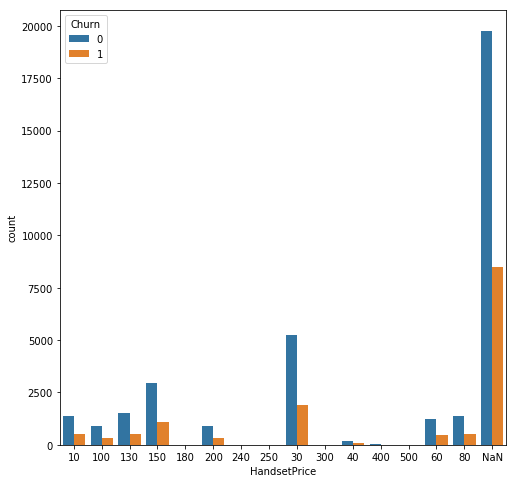

In [136]:
# Dealing with handsetprice

plt.figure(figsize=(8,8))
sns.countplot(x='HandsetPrice', hue='Churn', data=Data);

print('As HandsetPrice contain many missing values, that represent a large \n proportion '
      r'of the data, this attribute will not discard the missing values'
     '\ninstead they will be assumed as cero as the information does not exist')

In [0]:
# Changing the values NaN for 0 in the attribute Handset Price
Data['HandsetPrice']=Data['HandsetPrice'].replace("NaN",0)


#Converting the attribute Handset Price into a float64 data type.

Data['HandsetPrice']=Data['HandsetPrice'].astype('float')

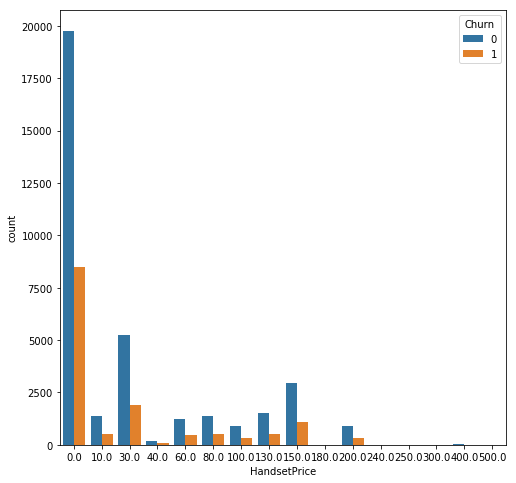

In [147]:
plt.figure(figsize=(8,8))
sns.countplot(x='HandsetPrice', hue='Churn', data=Data)

In [89]:
Data['Churn'].value_counts()

0    35507
1    14245
Name: Churn, dtype: int64

In [170]:
# Correlation test 

Data.corr()['Churn'].sort_values(ascending = False)

Churn                      1.000000
CurrentEquipmentDays       0.102513
RetentionCalls             0.058422
RetentionOffersAccepted    0.034511
UniqueSubs                 0.032839
HandsetRefurbished         0.030026
MaritalStatus_Unknown      0.025298
MonthsInService            0.017544
OverageMinutes             0.015301
Homeownership              0.013716
PrizmCode_Rural            0.013098
ActiveSubs                 0.013049
PercChangeRevenues         0.013015
PrizmCode_Town             0.011725
RoamingCalls               0.010955
ChildrenInHH               0.009505
Occupation_Other           0.007613
Occupation_Homemaker       0.004795
Occupation_Student         0.003106
Occupation_Clerical        0.001502
Occupation_Crafts         -0.002720
CallForwardingCalls       -0.003161
RVOwner                   -0.003280
Occupation_Self           -0.003955
BlockedCalls              -0.004474
MaritalStatus_Yes         -0.004567
PrizmCode_Other           -0.004730
TruckOwner                -0

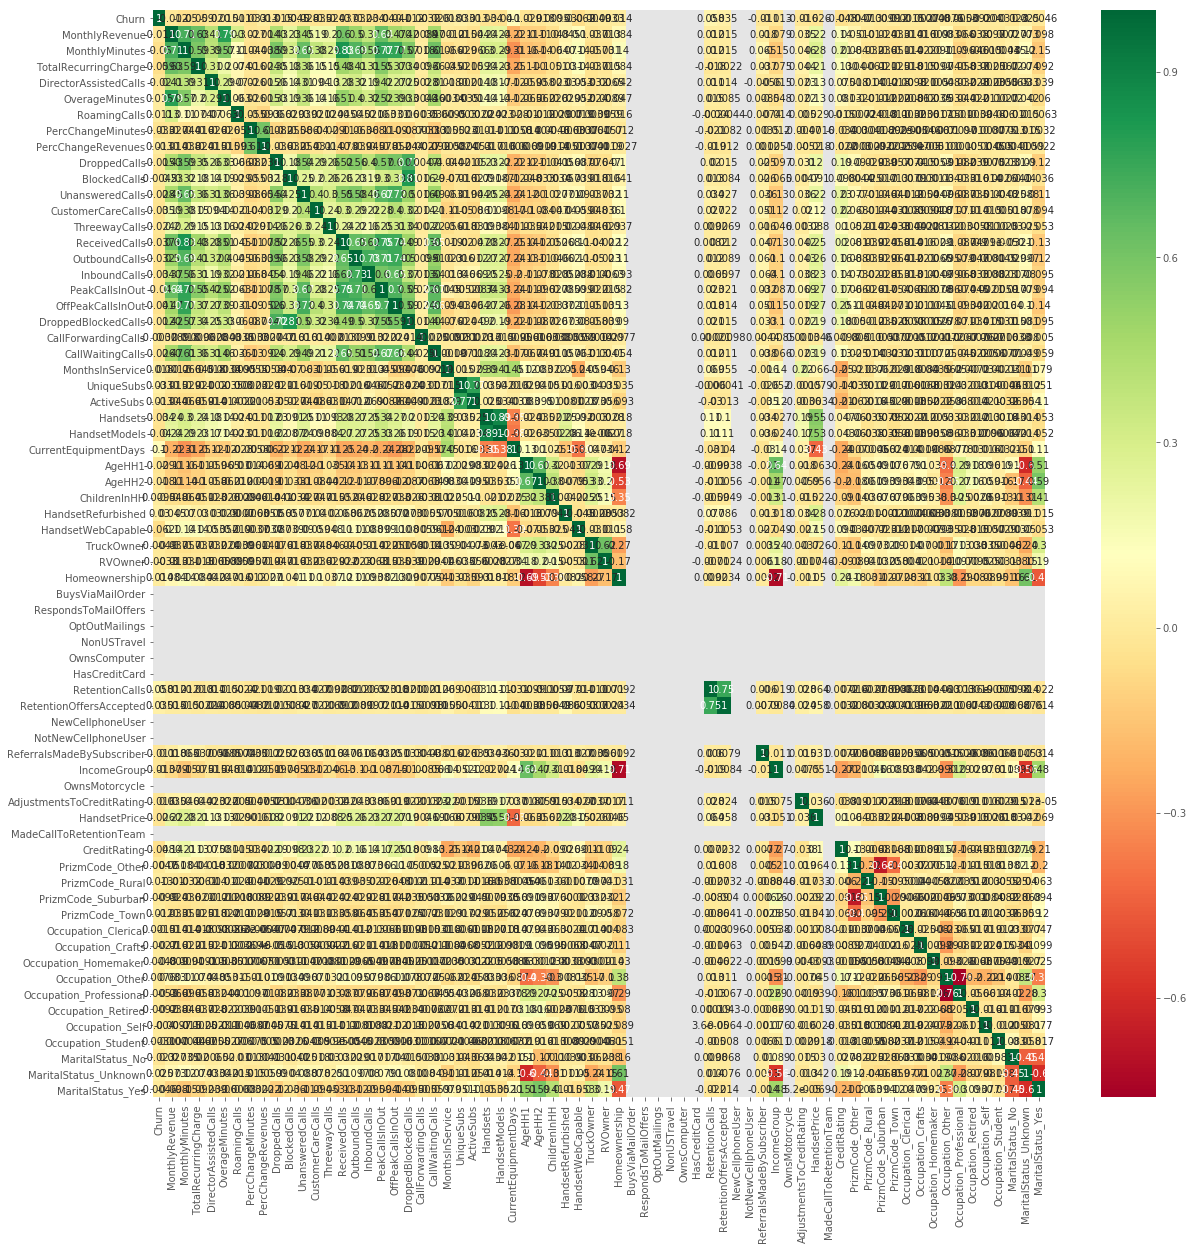

In [173]:
corrmat = Data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [209]:
import pandas as pd
from sklearn import preprocessing

x = X.to_records()
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

TypeError: ignored

In [0]:
# Chi-Square test

#Dropping the categorical attributes for this test

NData = Data.copy()

NData = NData.drop('ServiceArea', 1)


#Splitting the data in accordance to Churn

X = NData.iloc[:,1:67] 

y = NData.iloc[:,1]   

In [0]:
Z = pd.DataFrame(X, index = NData.index, columns = NData.columns)

In [0]:
X

In [0]:
# Chi-Square test

#Dropping the categorical attributes for this test

NData = Data.copy()

NData = NData.drop('ServiceArea', 1)


#Splitting the data in accordance to Churn

X = NData.iloc[:,1:67] 

y = NData.iloc[:,1]    


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [186]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: ignored

In [18]:
# converting Pandas data to numpy array

Churndata = Data.values

Churndata.shape

(51047, 58)

In [0]:
#spliting the data between dependent variables and independet variables
#customer ID is elminated from the data as it is not relevant for modeling.

x = Churndata[:,2:]

#independent variable

y = Churndata[:,1]

In [95]:
print(Data['HandsetPrice'].isnull().sum())

0


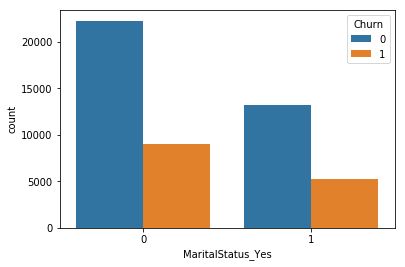

In [94]:
sns.countplot(x='MaritalStatus_Yes', hue='Churn', data=Data);


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pathlib import Path
from google.colab import drive

DATA_FILENAME = "Churndata"

data_dir = Path('./content/drive/My Drive/Churndata/')
data_dir.mkdir(parents=True, exist_ok=True) 
filepath = data_dir / DATA_FILENAME

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1VYOQ-wOo-KMqPgKA4b5pl4xoNzE2YbX2'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(str(filepath))

In [3]:
import skimage
import numpy as np
import pandas as pd
import random as rd

import torch.utils.data
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
import torchvision
import torchvision.transforms as transforms

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

from sklearn.preprocessing import normalize
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools
from skimage.io import imread
from skimage.transform import resize
import keras
from keras.utils.np_utils import to_categorical

from time import time
import logging

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import tree

from sklearn. ensemble import  BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import time


Using TensorFlow backend.


In [7]:
data = datasets('/content/drive/My Drive/Churndata/train/', transform=ToTensor())

TypeError: ignored

### VIII.I.I Loading the dataset with Pytorch.

<br><p align="justify">In this section, we will use Pytorch to load the images. This Scientific computing package boosts the speed by allowing us to use the power of GPUs. This will enable us to develop neural networks to construct a classifier that identifies when a mole is benign or malignant.

<br><p align="justify">Thus, let's import the datasets by using the functions Dataloader.

In [0]:
tr_data = datasets.ImageFolder('/content/drive/My Drive/skindata/train/', transform=ToTensor())
validation_data = datasets.ImageFolder('/content/drive/My Drive/skindata/test/', transform=ToTensor())

tr_dataload = torch.utils.data.DataLoader(tr_data, batch_size= 2637, shuffle = True)
validation_dataload = torch.utils.data.DataLoader(validation_data, batch_size= 660, shuffle = True)

<p align="justify">Once the Torch tensors have been created and the images have been load in the two tensors, we will shuffle the order and assign inputs to the tensor describing the images and labels for the tensor describing the classes, respectively for each set. Additionally, we will define the classes as Benign and Malignant.

In [0]:
dataiter = iter(tr_dataload)
images, labels = dataiter.next()

valiter = iter(validation_dataload)
vimages, vlabels = valiter.next()

# Definign the classes

classes = ('Benign','Malignant')

In [0]:
print("The training data is represented by a tensor that works similarly to a numpy ndarray")
print("The tensor containing the training data is:", images.shape, labels)
print("Similarly happens with the validation test")
print("The tensor containing the validation data is:",vimages.shape, vlabels.shape)

The training data is represented by a tensor that works similarly to a numpy ndarray
The tensor containing the training data is: torch.Size([2637, 3, 224, 224]) tensor([0, 1, 0,  ..., 1, 0, 1])
Similarly happens with the validation test
The tensor containing the validation data is: torch.Size([660, 3, 224, 224]) torch.Size([660])


<p align="justify">Once the dataset is in torch format, it is possible to plot the images by transposing the matrixes to a format  2637, 224,224,3. Where 2637 represents the number of images in the training set; 224 by 224 represents the number of pixels and 3 the RGB colours

The following picture corresponds to a Malignant mole


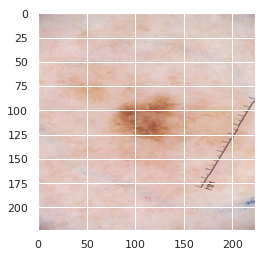

In [0]:
n=5
plt.imshow(np.transpose(images[n]))
print("The following picture corresponds to a {} mole".format(classes[labels[n]]))

###  VIII.I.II Alternative for loading images

<p align="justify">The following procedure corresponds to the same process performed before to upload images. As the File has two folders, one contains a trainset and the other as the testing set. This has been preset by Kaggle, so in this case, we are going to take the training set and split it into a training and testing and we are going to take the test file as a validation set for a final evaluation of our model.

<br><p align="justify">First, it is required to convert the data to RGB and label them:

In [0]:
FileBenignTrain = '/content/drive/My Drive/skindata/train/benign'
FileMalignTrain = '/content/drive/My Drive/skindata/train/malignant'

FileBenignTest = '/content/drive/My Drive/skindata/test/benign'
FileMalignTest = '/content/drive/My Drive/skindata/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

Now, we will load the training set:

In [0]:
BeningImages = [read(os.path.join(FileBenignTrain, filename)) for
              filename in os.listdir(FileBenignTrain)]
XBening = np.array(BeningImages, dtype='uint8')


MalignantImages = [read(os.path.join(FileMalignTrain, filename)) for
                 filename in os.listdir(FileMalignTrain)]
XMalignant = np.array(MalignantImages, dtype='uint8')

# we will load the testing pictures as a testing set

BeningImages = [read(os.path.join(FileBenignTest, filename)) for
              filename in os.listdir(FileBenignTest)]
XBeningTest = np.array(BeningImages, dtype='uint8')
MalignantImages = [read(os.path.join(FileMalignTest, filename)) for
                 filename in os.listdir(FileMalignTest)]
XMalignantTest = np.array(MalignantImages, dtype='uint8')

In [0]:
# Now lets check the shape of our arrays
# Different to the Torch tensors performed before
XBening.shape

(1440, 224, 224, 3)

<p align="justify">The XBening array contains 1440 images with size 224x224 using the RGB colours.
  
<br><p align="justify">Let's give labels to the images by assigning zero when the classification is Bening(0) and ones when the classification is Malignant(1). Thus, the set XBening will have a corresponding array YBening with values zeros for each one of the observations. That is why the size of the first element of the array XBening or in other words XBening[0] will determine the size of the zero array representing the labels as YBening.

<br><p align="justify">Equally, it applies to XMalignant(1) and the testing sets.

In [0]:
YBening = np.empty(XBening.shape[0], dtype = str)
for i in range(XBening.shape[0]):
  YBening[i]="Bening"
YMalignant = np.empty(XMalignant.shape[0], dtype = str)
for i in range(XMalignant.shape[0]):
  YMalignant[i]="Malignant"


YBeningTest = np.empty(XBeningTest.shape[0], dtype = str)
for i in range(XBeningTest.shape[0]):
  YBeningTest[i]="Bening"
YMalignantTest = np.empty(XMalignantTest.shape[0], dtype = str)
for i in range(XMalignantTest.shape[0]):
  YMalignantTest[i]="Malignant"

  
print("The shape of the XMalignant array is: {}".format(XMalignant.shape))
print("the number of observations in this array is {}".format(XMalignant.shape[0]))
print("Which has to have the same number of labels represented by the YMalignant array whose shape is {}"
      .format(YMalignant.shape))

The shape of the XMalignant array is: (1197, 224, 224, 3)
the number of observations in this array is 1197
Which has to have the same number of labels represented by the YMalignant array whose shape is (1197,)


<p align="justify">After building correspondent arrays with the classes for each image, we are going to merge benign images and malignant images creating a train set and a testing set respectively, and we will do the same with the labels.

In [0]:
X_train = np.concatenate((XBening, XMalignant), axis = 0)
y_train = np.concatenate((YBening, YMalignant), axis = 0)

X_test = np.concatenate((XBeningTest, XMalignantTest), axis = 0)
y_test = np.concatenate((YBeningTest, YMalignantTest), axis = 0)

print("Thus, the training set will have a shape of {}".format(X_train.shape))
print("And the testing set will have a shape of {}".format(X_test.shape))

Thus, the training set will have a shape of (2637, 224, 224, 3)
And the testing set will have a shape of (660, 224, 224, 3)


<p align="justify">With this methodology we achieve the same shape as the torch tensors. However the matrixes here are transposed, having the RGB colors as the last axis in the array. 

<p align="justify">On the other hand, in order to prevent bias in the model we are going to shuffle the data.

In [0]:
shuffled = np.arange(X_train.shape[0])
np.random.shuffle(shuffled)
X_train = X_train[shuffled]
y_train = y_train[shuffled]

shuffled = np.arange(X_test.shape[0])
np.random.shuffle(shuffled)
X_test = X_test[shuffled]
y_test = y_test[shuffled]

In [0]:
target_names= np.empty(2, dtype = '<U9')



target_names[0] = 'Bening'
target_names[1] = 'Malignant'

target_names


array(['Bening', 'Malignant'], dtype='<U9')

## VIII.II Exploring, Processing and visualizing the data


<p align="justify">Let's begin by visualizing the data from the Numpy arrays. The following images show two clusters of benign and malignant moles taken directly from the folders Bening and Malignant.

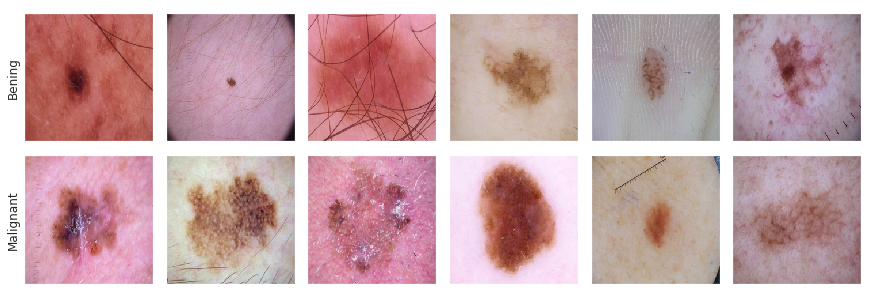

In [0]:
fig, ax = plt.subplots(2, 6, figsize=(15, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(6):
    ax[0, i].imshow(XBening[i])
    ax[1, i].imshow(XMalignant[i])
    
ax[0, 0].set_ylabel('Bening')
ax[1, 0].set_ylabel('Malignant');

### VIII.II.I Evaluating the data proportions


<p align="justify">Following, it is important to evaluate if it is necessary to balance the data before fitting the training data into the classifiers. To do so, a pie chart on the training set folder will be plotted in order to see the proportions of Malignant and Bening images in this set.


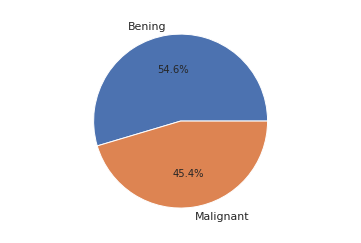

In [0]:
pie_chart_values = [XBening.shape[0], XMalignant.shape[0]]


plt.axis('equal')
plt.pie(pie_chart_values, labels = target_names, autopct= '%0.1f%%')
plt.show()

<p align="justify">After plotting the training set it can be concluded that the set does not require balancing to be fit in the classifier.

<br><p align="justify">Next, we are going to define the framework of this project. We intend to create the best approach to find a classifier or a group of classifiers that will classify benign and malignant moles in order to detect skin cancer.

<br><p align="justify">First, we are going to transform the torch tensors to numpy arrays in order to train models using the sklearn library. Secondly we will use the torch tensors to train Neural Network models.

<br><p align="justify">Lastly, we will choose the 3 top algorithms with the best performance and will create an Assamble method to get the algorithms to vote to find the best model predictor.

<br><p align="justify">The training set will be split for training and testing and the test set will be used for validation at the end to compare evaluate the resulting model

In [0]:
#Let's transform the tensor to a numpy array in order to work with the sklearn library

X_train = images.numpy().reshape([images.shape[0],-1])
print('The shape of the Numpy train array is {}'.format(X_train.shape))

y_train = labels.numpy()
print('The shape of the Numpy labels array is {}'.format(y_train.shape))

The shape of the Numpy train array is (2637, 150528)
The shape of the Numpy labels array is (2637,)


In [0]:
X = X_train
y = y_train


#let's partition the data in 70/30 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)

print('after partioning the traing set the new size of the training array is {}'.format(X_train.shape))
print('after partioning the test set the new size of the training array is {}'.format(X_test.shape))

after partioning the traing set the new size of the training array is (1845, 150528)
after partioning the test set the new size of the training array is (792, 150528)


## VIII.III A simple classifier

<br><p align="justify">In this section, we are going to build a simple classifier and train it with the training set and will measure the time this takes. This exercise will serve as a reference point because subsequently we will develop methods to reduce the complexity of the data (by using PCA for example) so the model runs in less time and also will compare their performance. Let's start with a simple decision tree:

In [0]:
from time import time
import logging

# Transforming the classes list to a numpy array
target_names = np.array(classes)
target_names

array(['Benign', 'Malignant'], dtype='<U9')

In [0]:
print("Training the classifier on the training set")

t0 = time()

clft = tree.DecisionTreeClassifier()
clft = clftree.fit(X_train, y_train)

print("Training the model took {}s".format(time() - t0))

Training the classifier on the training set
Training the model took 171.086571931839s


<p align="justify">Next, we are going to evaluate the model using the test set and comparing the results given by the model with the original labels.


In [0]:
print("Using the model on the test set to classify moles")
t0 = time()
y_pred = clft.predict(X_test)
print("The time it takes to evaluate the test set is {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=(0,1)))

Using the model on the test set to classify moles
The time it takes to evaluate the test set is 0.14436721801757812s
              precision    recall  f1-score   support

      Benign       0.77      0.83      0.80       422
   Malignant       0.79      0.71      0.75       370

    accuracy                           0.78       792
   macro avg       0.78      0.77      0.77       792
weighted avg       0.78      0.78      0.77       792

[[351  71]
 [107 263]]


In [0]:
clft.score(X_test, y_test)

0.7752525252525253

### Conclusion 1

<p align="justify">The classifier took long time (191.44 seconds) to be trained with the training set because of the high complexity of the image data. As a single image has a dimensionality of 224 x 224 and it is adding colors in a third dimension with three colors RGB, the computational calculation is quite high.

<br><p align="justify">Our main goal is to reduce the complexity of the classifier and therefore our first approach is to implement Principal Components Analysis to reduce the number of Dimensions and therefore the complexity of the model.

## VIII.IV Principal Components Analysis

<p align="justify">Due to a large number of components or dimensions found in the image, the performance of the algorithm gets affected by big calculations. In this section, we will implement PCA in order to reduce the number of components or dimensions in the image space, so the algorithm will perform fewer calculations and reduce its computational cost.

In [0]:
print("Reducing the number of components by using PCA...")

n_components = 791

t0 = time()

pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)

print('Reducing the number of components to {}, takes {}s'.format(n_components, time() - t0))
print('Hence, the new shape of the array will represent the dimentionality reduced image')
print('The size of the new array is {}'.format(X_train_pca.shape))

Reducing the number of components by using PCA...
Reducing the number of components to 791, takes 63.708561182022095s
Hence, the new shape of the array will represent the dimentionality reduced image
The size of the new array is (1845, 791)


<p align="justify">Next, it is important to evaluate the cumulative explained variance of the components. To do this we plot the report of PCA using 791 components to visualize the cumulative variance of the first 791 components. This number corresponds to the condition n< min(X_test.shape[0])

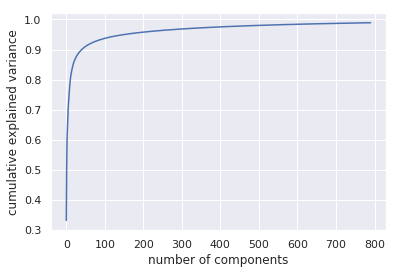

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<p align="justify">As we can observed, the first 791 components explain the cumulative variance close to 100% of the image, which indicates a much smaller number to train the models rather than the initial 150.528 components.

<br><p align="justify">Following, we are going to reconstruct the images in order to see the difference between a full image (Including all the components) and a dimentionality reduced image(Only with the first 791 components).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


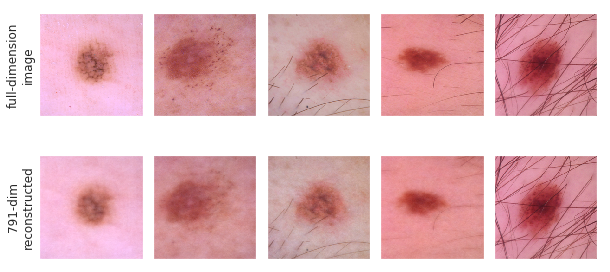

In [0]:
#Let's start by transforming the array with shape (1845,500) back to 
#(1845,150528 )

projected = pca.inverse_transform(X_train_pca)

#and plot the comparison between a full image vs a reconstructed image
fig, ax = plt.subplots(2, 5, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(np.transpose(X_train[i].reshape(3,224,224)))
    ax[1, i].imshow(np.transpose(projected[i].reshape(3,224,224)))
    
ax[0, 0].set_ylabel('full-dimension\nimage')
ax[1, 0].set_ylabel('791-dim\nreconstructed');

<p align="justify">Now we will compare the performance of the same classifier but this time using fewer components. Let's first start by reducing the components of the test set. 

In [0]:
# reducing the components in the testing set.

X_test_pca = pca.fit_transform(X_test)

### VIII.IV.I Decision Tree

<p align="justify">Now, we are going to take advantage of the benefits of dimensionality reduction, by training the same simple classifier with fewer dimensions.

In [0]:
print("Training the classifier on the training set")

t0 = time()

clftree = tree.DecisionTreeClassifier()
clftree = clftree.fit(X_train_pca, y_train)

print("Training the model took {}s".format(time() - t0))

Training the classifier on the training set
Training the model took 1.2140939235687256s


<p align="justify">The classifier took less time in being trained, only 1.28 seconds. This is a considerably big difference between training the classifier with the full dimensions and with fewer dimensions. Therefore, it enables us to optimize the parameters of classifiers to achieve better results. In other words, we can perform more calculations and evaluations because we have reduce the input weight. Now we will test the performance of the classifier by evaluating the test set.





In [0]:
print("Using the model on the test set to classify moles")
t0 = time()
y_pred = clftree.predict(X_test_pca)
print("The time it takes to evaluate the test set is {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=(0,1)))

Using the model on the test set to classify moles
The time it takes to evaluate the test set is 0.001646280288696289s
              precision    recall  f1-score   support

      Benign       0.65      0.70      0.67       422
   Malignant       0.62      0.58      0.60       370

    accuracy                           0.64       792
   macro avg       0.64      0.64      0.64       792
weighted avg       0.64      0.64      0.64       792

[[294 128]
 [157 213]]


### Conclusion 2

<p align="justify">The time the classifier takes to be trained takes with the data training data that has been dimensionality reduced is considerably less than with the full dimensions, due to the less computational cost that PCA generates. However, the accuracy of the classifier gets affected by this and, therefore this gives us an idea of the importance of many of the components. 

<br><p align="justify">Following we are going to try different algorithms to seek for an improved accuracy, by using the power of PCA.

### VIII.IV.I Support Vector Machine

<br><p align="justify">Following the support vector machine algorithm is implemented. The performance of the algorithm will be optimized by using the GridSearchCV function from the library Sklearn. This function optimizes the parameters by searching over specific values. Additionally, in order to reduce the variance and overfitting problems, it is intended to use bagging from now on, to improve the stability and accuracy of our classifiers.


In [0]:
print("Training SVM with training set")

t0 = time()

#List the parameters of SVD that will be evaluated in the model to find the best combination.

param_grid = {'C': [10,20,30,40,50],
              'gamma': [0.001, 0.002, 0.003], }



clfSVM = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)


clfSVM = clfSVM.fit(X_train_pca, y_train)

print("done in {}s".format(time() - t0))
print("Best estimator found by GridSearchCV:")
print(clfSVM.best_estimator_)

Training SVM with training set
done in 188.6348569393158s
Best estimator found by GridSearchCV:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
# Checking overfiting evaluating the training data.

print('The model explains {}% of the training data'.format(clfSVM.score(X_train_pca, y_train)*100))


The model explains 100.0% of the training data


<p align="justify">Therefore there is an overfitting problem. Thus we use bagging to reduce the capability of the model of explaining the training data by 100%. Bagging samples the training set over a specific percentage of the total and repeats this process several times. It was decided to perform Bagging with 90% of the training set, 10 times.

In [0]:
# Bagging
print("Performing Bagging to reduce overfitting")

t0 = time()

bg1 = BaggingClassifier(clfSVM, max_samples= 0.9, max_features = 1.0, n_estimators = 30)
bg1.fit(X_train_pca, y_train)

print("done in {}s".format(time() - t0))
print('The model now, explains {}% of the training data'.format(bg1.score(X_train_pca, y_train)*100))

Performing Bagging to reduce overfitting
done in 32.24295616149902s
The model now, explains 99.13279132791328% of the training data


<p align="justify">The model is not overfitted anymore and therefore we can perform an evaluation of the model with the test set.

In [0]:
print("Predicting skin cancer on the test set")
t0 = time()
y_pred = bg1.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))

Predicting skin cancer on the test set
done in 18.17702841758728s
              precision    recall  f1-score   support

      Benign       0.83      0.66      0.74       422
   Malignant       0.69      0.84      0.76       370

    accuracy                           0.75       792
   macro avg       0.76      0.75      0.75       792
weighted avg       0.76      0.75      0.75       792

[[280 142]
 [ 58 312]]


In [0]:
bg1.score(X_test_pca, y_test)

0.7474747474747475

### Conclusion 3.

<p align="justify">By reducing the number of components the algorithm takes less time in being trained and therefore becomes more efficient. Thus, parameter optimization and performing bagging on the algorithm becomes easier.

<br><p align="justify">With this implementation, the classifier performed better than the initial classifier with the full input.

### VIII.IV.II Random Forest

<p align="justify">The following section will train a random forest classifier. As random forest classifiers tend to overfit, bagging will be applied to reduce the variance and reduce the level of explanation of the entire training set by the model. The parameter will be optimized to find the best number of trees and their depth.

In [0]:
clfRF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [0]:
print("Training the Random Forest classifier with training set")

param_grid = {'n_estimators': (100, 200),
              'max_depth': (100,200), }
clfRF = GridSearchCV(RandomForestClassifier(random_state=0, bootstrap = True,
                                           max_features = 'sqrt'),
                     param_grid, cv=5, iid=False)
                  
clfRF = clfRF.fit(X_train_pca, y_train)
print("done in {}s".format(time() - t0))
print("Best estimator found by grid search:")
print(clfRF.best_estimator_)

Training the Random Forest classifier with training set
done in 371.91853499412537s
Best estimator found by grid search:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [0]:
clfRF = RandomForestClassifier(n_estimators=200, random_state=0, 
                               bootstrap = True, max_depth=100,
                                           max_features = 'sqrt')
                  
clfRF = clfRF.fit(X_train_pca, y_train)

In [0]:
# Checking overfiting evaluating the training data.

print('The model explains {}% of the training data'.format(clfRF.score(X_train_pca, y_train)*100))

The model explains 100.0% of the training data


In [0]:
# Performing Bagging to reduce variance and overfitting problems.
print("Performing Bagging to reduce overfitting")
t0 = time()

bg2 = BaggingClassifier(clfRF, max_samples= 0.9, max_features = 1.0, n_estimators = 10)
bg2.fit(X_train_pca, y_train)

print("done in {}s".format(time() - t0))
print('The model now, explains {}% of the training data'.format(bg2.score(X_train_pca, y_train)*100))

Performing Bagging to reduce overfitting
done in 39.79681396484375s
The model now, explains 99.24119241192412% of the training data


In [0]:
print("Predicting Cancer moles on the test set")
t0 = time()
y_pred = bg2.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Predicting Cancer moles on the test set
done in 0.40464138984680176s
              precision    recall  f1-score   support

      Benign       0.93      0.59      0.72       422
   Malignant       0.67      0.95      0.79       370

    accuracy                           0.76       792
   macro avg       0.80      0.77      0.75       792
weighted avg       0.81      0.76      0.75       792

[[248 174]
 [ 18 352]]


In [0]:
bg2.score(X_test_pca, y_test)

0.7575757575757576

### Conclusion 4.

<p align="justify">PCA is a powerful tool that reduces the complexity of the input features by conserving the most relevant features in a projection. After training all the classifiers with dimensionality reduced sets, it was possible to achieve less time and more efficiency, and therefore many of the parameters were optimized. However, the performance was compromised by some points in accuracy in some of the classes. To do a better comparison, the ROC and AUC analysis will help determining which one of the models is best. This, because even though decision tree, without PCA, appears to have higher levels of accuracy, this does not mean is a better classifier because we did not consider overfitting and variance problems. The Analysis will be perform in a later section.

### VIII.IV.II Assemble classifier

<br><p align="justify"> In the following section, we will evaluate the results of each of the algorithms and will perform a soft voting in order to achieve a better result. The soft voting means that a weight will be assign to the classifiers according to how they performed previously. This algorithm will collect and evaluate the votes and yield the result.

In [0]:
from sklearn.ensemble import VotingClassifier

print("Applying a voting classifier by using weighted votes")
t0 = time()

eclf = VotingClassifier(estimators=[('tree', clftree), ('svm', bg1),
                                    ('rf', bg2)], voting='soft', weights=[1, 2, 3])


eclf = eclf.fit(X_train_pca, y_train)

print("done in {}s".format(time() - t0))

Applying a voting classifier by using weighted votes
done in 72.87995433807373s


In [0]:
print("Predicting Cancer moles on the test set using the voting classifier")
t0 = time()
y_pred = eclf.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

Predicting Cancer moles on the test set using the voting classifier
done in 18.44237971305847s
              precision    recall  f1-score   support

      Benign       0.85      0.67      0.75       422
   Malignant       0.69      0.87      0.77       370

    accuracy                           0.76       792
   macro avg       0.77      0.77      0.76       792
weighted avg       0.78      0.76      0.76       792

[[281 141]
 [ 49 321]]


In [0]:
eclf.score(X_test_pca, y_test)

0.76010101010101

### Conclusion 5.

<p align="justify">The voting classifier served as our decision making tool, by making the previously trained classifiers to vote for the classes in each one of the observations. Implementing assemble classifier the classification performance is enhanced. Implementing support vector machine, decision tree and random forest the performance of the algorithms combine to produce a better result of an AUC of 82%. The results can be explained due to the capacity of Asembleer classifier to combine and enhance the classification of all the algorithms implemented at the same time.
  
<br><p align="justify">This approach is very important in the skin cancer detection because it is considering the "point of view of many classifiers", serving like a consensus of experts and getting them to vote.


## VIII.V ROC and AUC evaluation and comparison

<p align="justify">The following section will perform a comparison between all the classifiers to get a better metric and a stronger conclusion in terms of performance.

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


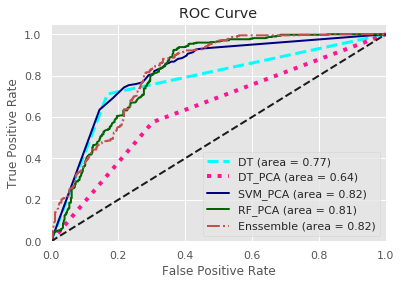

In [0]:
# Probabilities for each class for each classifier.

probs = clft.predict_proba(X_test)[:, 1]
tprobs = clftree.predict_proba(X_test_pca)[:, 1]
svm_probs = bg1.predict_proba(X_test_pca)[:, 1]
rf_probs = bg2.predict_proba(X_test_pca)[:, 1]
e_probs = eclf.predict_proba(X_test_pca)[:, 1]


fpr_, tpr_, _ = roc_curve(y_test, probs)
roc_auc_ = auc(fpr_, tpr_)

fpr_tree, tpr_tree, _ = roc_curve(y_test, tprobs)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_e, tpr_e, _ = roc_curve(y_test, e_probs)
roc_auc_e = auc(fpr_e, tpr_e)

plt.figure()
plt.plot(fpr_, tpr_, color='aqua', linestyle='--', linewidth=3,
         lw=2, label='DT (area = %0.2f)' % roc_auc_)
plt.plot(fpr_tree, tpr_tree, color='deeppink', linestyle=':', linewidth=4,
         lw=2, label='DT_PCA (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_svm, tpr_svm, color='navy',
         lw=2, label='SVM_PCA (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_rf, tpr_rf, color='darkgreen',
         lw=2, label='RF_PCA (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_e, tpr_e, color='r',linestyle='-.',
         lw=2, label='Enssemble (area = %0.2f)' % roc_auc_e)
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusion 6

<p align="justify">The ROC curve depicts the performance of the algorithms implemented. The implementation of PCA improves the efficiency of the algorithms by reducing the execution time. For instance, DT_PCA was executed in less time, however, we reduce images' components sacrificing important information of the images and reducing the accuracy from the initial DT. Assemble classifier provides higher accuracy combining decision trees, support vector machine and random forest, all trained with PCA data.

## VIII.VI Final evaluation with the unseen data

<p align="justify">Following, we will perform the evaluation of the Assemble classifier with the unseen data. Note that the assemble classifier only contains the classifiers that were trained after performing PCA and therefore it is necessary to apply PCA as well and reshape the array to meet the PCA number of components.

In [0]:
#Let's transform the tensor to a numpy array in order to work with the sklearn library

X_test = vimages.numpy().reshape([vimages.shape[0],-1])
print('The shape of the Numpy train array is {}'.format(X_test.shape))

y_test = vlabels.numpy()
print('The shape of the Numpy labels array is {}'.format(y_test.shape))

print('resizing the arrays to apply pca')

X_test = np.concatenate((X_test,X_test1), axis=0)

print('Applying PCA to the test set...')

t0= time()
X_test_pca = pca.fit_transform(X_test)

print("done in {}s".format(time() - t0))

print('Now fitting the test data into the Assemble classifier')

t1 = time()
y_pred = eclf.predict(X_test_pca)
print("done in {}s".format(time() - t1))

y_test = np.concatenate((y_test, np.copy(y_test)), axis = 0)

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

e_probs = eclf.predict_proba(X_test_pca)[:, 1]
roc_auc_e = auc(fpr_e, tpr_e)

print('AUC = {}'.format(roc_auc_e))

The shape of the Numpy train array is (660, 150528)
The shape of the Numpy labels array is (660,)
resizing the arrays to apply pca
Applying PCA to the test set...
Applying PCA to the test set...
done in 51.559245347976685s
Now fitting the test data into the Assemble classifier
done in 30.688194513320923s
              precision    recall  f1-score   support

      Benign       0.85      0.73      0.79       720
   Malignant       0.73      0.85      0.78       600

    accuracy                           0.79      1320
   macro avg       0.79      0.79      0.79      1320
weighted avg       0.80      0.79      0.79      1320

[[528 192]
 [ 90 510]]
AUC = 0.818669143076726


### Conclusion 7

<p align="justify">By applying PCA and Assemble methods, on different classifiers, it was possible to outperform the initial simple algorithm not only by metrics, but also on time and efficiency. Reducing the components help training different classifiers in a considerably faster speed, and allow us to ensure that overfitting and high variance was taken care of. In contrast, the same process using the full image imput will have been traduced in a very slow efficiency and parameter optimization, generating possibly system crashes and memory outage.




## VIII.V. Convolutional Neural Network

<p align="justify">For Convolutional Neural Network it is important to normalize the data and transform it to tensors. The data is lowaded from the Training and Testing folders in the dataset folder by using torchvision as follow.


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

tr_data = datasets.ImageFolder('/content/drive/My Drive/skindata/train/',
                               transform = transform)
validation_data = datasets.ImageFolder('/content/drive/My Drive/skindata/test/',
                                       transform = transform)

tr_dataload = torch.utils.data.DataLoader(tr_data, batch_size= 6,
                                          shuffle = True, num_workers=2 )
validation_dataload = torch.utils.data.DataLoader(validation_data, 
                                                  batch_size= 6,
                                                  shuffle = True, num_workers=2)

classes = ('Benign','Malignant')

device = torch.device("cuda:0") if torch.cuda.is_available \
    else torch.device("cpu")


dataiter = iter(tr_dataload)
inputs, labels = dataiter.next()

<p align="justify">Using this format, it is possible to visualize the images just like it was done with numpy and the Sklearn libreries, previously. For this it is required to define a function and such as imshow from ptl.plot and  give it our own parameters. As the images are represented by a torch.tensor they need to be transposed. Consequently, we will bring the data into torches by iterating over the data and record the arrays in an object we define as images and the classes from the second torch in an object defined as labels.


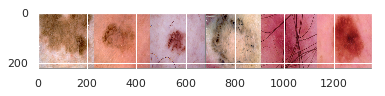

Malignant Malignant Malignant Malignant Benign Benign


In [0]:
def imshow(img):
    img = img/ 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
    
dataiter = iter(tr_dataload)
images, labels = dataiter.next()

# Plotting the images  with labels
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))


### VIII.V.I Setting up the Architecture

<p align="justify">To decide on the architecture of the Convolutional Neural Network is important to keep in mind that this data is in format RGB or in other words, 3-channel images. First, we are going to set two convolutional layers and one window with size five by five by three, that is represented by the size of the Kernel. The first layer will contain the 3 channels representing the RGB as the in channel input; the second layer will take the out channel from the first layer as the in channel. The channels will be set randomly, so we tried a different combination of numbers as parameters to optimize.
  
<br><p align="justify">Additionally, it is necessary to add the pooling by adding MaxPool2d and give it a size two by two. Once the firs layers and the pool are set, the fully connected layers will be defined. The first fully connecter layer will contain the flatten output generated by the second convolutional layer and by the flatten output of the second layer. This calculation is done by calculating the flatten output of the first layer and second layer by using the convolutional formula as follow:
  

<br> $h_1= \frac{h_0- f + 2p}{s} + 1$
  
 <br>Where  $h_n$ is the high or width,
  <br>f is the filte size or kernel size
  <br>p is padding that will be set to zero
  <br>s is stride that will be set to 1
  

<br><p align="justify">Each convolutional layer will take in consideration the pool size to be divided by it and be considered as the high or width of the next convolution. Subsequently we would choose the number of output features as a random number until in the same dynamic until getting to the last fully connected layer that will intake the number of classes as the out features.

<br><p align="justify">Then we set the forward function that consist of a series of activations by pooling layers for each of the convolutions. Then we will use view and will convert the flatten into a vector and finally we will call the fully connected layers.

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  
    def __init__(self):
      
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 20, kernel_size = 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 30,kernel_size = 5)
        self.fc1 = nn.Linear(in_features = 30*53*53, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.fc3 = nn.Linear(in_features = 60, out_features = 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 30*53*53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)

# Let's see check if we are on a CUDA Machine:

print(device)

cuda:0


Following we will define the loss function and will train the classifier with the training data by performing 10 epochs.

In [0]:
import torch.optim as optim
from time import time
import logging

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
print('Training the CNN classifier...')
t0 = time()

#creating a loop that loops over the training set many times
for epoch in range(10):  
  
    running_loss = 0.0
    for i, data in enumerate(tr_dataload, 0):
        # the training set as a torch contains the images and the classes
        # images will be taken as inputs and the classes as labels
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0


print("done in {}s".format(time() - t0))
print('Finished Training')

criterion = nn.CrossEntropyLoss()

Training the CNN classifier...
[1,   200] loss: 6.515
[1,   400] loss: 5.016
[2,   200] loss: 4.301
[2,   400] loss: 4.155
[3,   200] loss: 3.831
[3,   400] loss: 3.856
[4,   200] loss: 3.774
[4,   400] loss: 3.742
[5,   200] loss: 3.402
[5,   400] loss: 3.678
[6,   200] loss: 3.342
[6,   400] loss: 3.472
[7,   200] loss: 3.520
[7,   400] loss: 3.243
[8,   200] loss: 3.076
[8,   400] loss: 3.004
[9,   200] loss: 2.675
[9,   400] loss: 2.961
[10,   200] loss: 2.480
[10,   400] loss: 2.717
done in 113.96432662010193s
Finished Training


In [0]:
print(net)

params = list(net.parameters())
print(len(params))
print(params[0].size())

Net(
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 30, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=84270, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=2, bias=True)
)
10
torch.Size([20, 3, 5, 5])


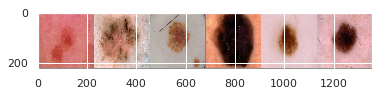

Real Class :    Benign Malignant Malignant Malignant Malignant Malignant
Predicted Class:  Benign Malignant Malignant Malignant Malignant Malignant


In [0]:
valiter = iter(validation_dataload)
inputs, labels = valiter.next()

# print images
imshow(torchvision.utils.make_grid(inputs))
print('Real Class :   ', ' '.join('%5s' % classes[labels[j]] for j in range(6)))

outputs = net(inputs.to(device))

_, predicted = torch.max(outputs, 1)

print('Predicted Class: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(6)))

Finally, the entire test set is evaluated in the trained classifier as follow:

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in validation_dataload:
        inputs, labels = data
        outputs = net(inputs.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print('Accuracy of the network on the {} test images: {}%'.format(660,
                                                                  100 * correct / total))
                                         

Accuracy of the network on the 660 test images: 83.93939393939394%


After evaluating the accuracy on the entire testing set, we will run an evaluation on the accuracy of the model predicting each one of the classes, that is to say the accuracy of each class.

In [0]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in validation_dataload:
        inputs, labels = data
        outputs = net(inputs.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.to(device)).squeeze()
        for i in range(6):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Our tuple corresponds to two classes: Malignant and benign.
for i in range(2):
    print('The Accuracy of {} is {}%'.format(classes[i], 
                                             round(100 * class_correct[i] / class_total[i])))

The Accuracy of Benign is 80%
The Accuracy of Malignant is 89%


### Conclusion 8

<br><p align="justify">The convolutional neural network was the model that outperformed all the models in this report. The accuracy reported was 83.94% and by class, it predicts accurately 89% of the malignant skin and 80% of the benign. The time it takes was fast enough considering that we used the power of GPUs.